In [1]:
import numpy as np
import matplotlib.pyplot as plt

## First task

The task is to create a custom probability distribution using two (i) inverse cumulative distribution and (ii) Monte-Carlo methods.

The custom probability distribution we create is 

\begin{equation}
P(X) = \frac{3}{2} \sqrt{1-X}
\end{equation}
with $X\in\{0,1\}$

In [2]:
def P_x(): #probability distribution using the inverse cumulative distribution method
    D = np.random.random() #random number with uniform distribution
    return 1-(1-D)**(2/3) #express the random number X with the inverse of 

In [3]:
test1 = []
sample_size = int(1e6)
for i in range(sample_size):
    test1.append(P_x())

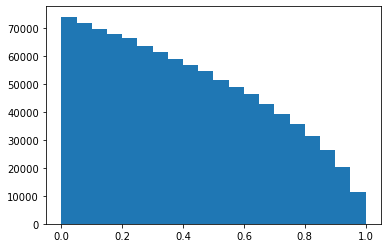

In [4]:
fig = plt.figure()
plt.hist(test1, bins = 20);

In [5]:
def xypx(): #auxiliary function for the monte-carlo method
    x = np.random.random() #create the random x coordinate
    y = np.random.random()*(3/2) #create the random y coordinate
    px= 3*np.sqrt(1-x)/2 #evaluate the probability density function we want to create
    return x,y,px

def P_x_MC(): #monte carlo method to create the probability density function
    #method described by the lecture notes
    x,y,px = xypx() 
    while px<y: 
        x,y,px = xypx()
    return y

In [6]:
test2 = []
sample_size = int(1e6)
for i in range(sample_size):
    test2.append(P_x_MC())

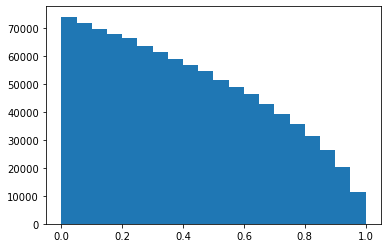

In [7]:
fig = plt.figure()
plt.hist(test1, bins = 20);

## Second task

The task is the write a code that shuffles a deck of cards and make sure that the shuffled deck is indeed random. This should be also checked with some code.

In [8]:
def shuffle1(current_deck): #first method to shuffle the deck
    n = len(current_deck) #get the size of the deck
    new_order = np.random.choice(np.arange(n),size = n, replace = False) #&reate a new ordering for the elements in the deck
    new_deck = np.zeros(n).astype(int)
    for i in range(n):
        new_deck[new_order[i]] = current_deck[i]
    return new_deck

In [9]:
def shuffle2(current_deck): #second method to shuffle a deck. Idea got from geeks and geeks
    n = len(current_deck) #get the size of the deck
    new_deck = current_deck.copy() #create a copy of the original deck
    
    for i in range(n): #iterate through the deck
        j = i + np.random.randint(n-i) #for every card indexed by i choose another random card with i<=j 
        temporary = new_deck[i] #exchange cards with index i and j
        new_deck[i] = new_deck[j]
        new_deck[j] = temporary
        #it can be analytically proven that this method yields a uniform distribution for the cards
    return new_deck

In [23]:
def randomness_checker(current_deck, iter_num, method = 2):
    n = len(current_deck)
    randomness_matrix = np.array([np.zeros(n) for i in range(n)], dtype = float) #n*n numbers used to describe the prob. distribution
                                                                                 #of the cards in the deck
    for i in range(iter_num):
        if method == 1: #using the shuffle1 function
            new_deck = shuffle1(current_deck) #shuffle the deck with the first implemented method
        elif method == 2:
            new_deck = shuffle2(current_deck) #shuffle the dekc with the second implemented method
        else:
            print("Incorrect method type was given!")
            return
        #update the elements of the randomness_matrix which describe the probability distribution of the cards in the deck
        
        randomness_matrix[new_deck,np.arange(n)] += 1/iter_num
    #in the randomness_matrix every corresponds to a card and every column coresponds to a position in the deck
    #we have a uniform distribution of cards whenever we see that all values in all entries equal meaning that every card has equal probability being 
    #at every position in the deck
    return randomness_matrix

In [24]:
n_test = 5 
test_deck = np.arange(n_test) #this is a test deck that we use because it is easier to debug with it

In [27]:
rm = randomness_checker(current_deck = test_deck, iter_num = 500000, method = 2)
print(rm)

[[0.200862 0.199144 0.200226 0.200268 0.1995  ]
 [0.199306 0.199092 0.199368 0.201438 0.200796]
 [0.200606 0.201382 0.19984  0.199098 0.199074]
 [0.20006  0.199514 0.20019  0.20015  0.200086]
 [0.199166 0.200868 0.200376 0.199046 0.200544]]


### We found that both shuffling method gives uniform distribution of the cards

## Third task

The task is to generate a list of random number and then pick one of them with a weight proportional to its value

In [13]:
def func1(random_list_size, test_list = None): #first method to carry out the task
    if test_list.all() == None: #with this one can test whether the prob distribution is indeed the one we need
        random_list = np.random.random(n = random_list_size)
    else:
        random_list = test_list
        #in this method we use a built in function of numpy to generate the distribution
    random_element = (np.random.choice(a = random_list, size = 1, p = random_list/np.sum(random_list)))[0]
    
    return random_list, random_element

In [14]:
def func2(random_list_size, test_list = None): #second method to carry out the task
    if test_list.all() == None: #same as before
        random_list = np.random.random(n = random_list_size)
    else:
        random_list = test_list
    
    #now use the method that was suggested by the lecturer
    r = np.sum(random_list)*np.random.random(size=1) #generate random number between 0 and sum
    i = -1 #start the index with -1
    while r>=0: #if r is positive
        i += 1
        r -= random_list[i] #substract the next number then check again for positivity
        
    return random_list,random_list[i]

In [28]:
def iterations(sample_size, random_list_size, test_list = None,method = 2): #go through random iterations for a given randomly chosen list to 
                                                                            #see whether the distributions are indeed correct
    if method == 1:
        datas = np.array([func1(random_list_size,test_list)[1] for i in range(sample_size)]) #fill datas with the randomly choosen numbers using method1
    elif method == 2:
        datas = np.array([func2(random_list_size,test_list)[1] for i in range(sample_size)]) #same but with method2
    return datas

In [41]:
test_list = np.arange(11)
random_list_size = len(test_list)
sample_size = 55000
d1 = iterations(sample_size = sample_size, random_list_size = random_list_size, test_list = test_list,method = 1)

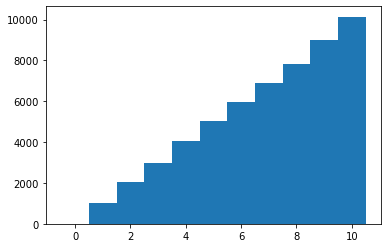

In [42]:
plt.hist(d1,bins = np.arange(random_list_size+1)-0.5);

In [43]:
test_list = np.arange(11)
random_list_size = len(test_list)
sample_size = 55000
d2 = iterations(sample_size = sample_size, random_list_size = random_list_size, test_list = test_list,method = 2)

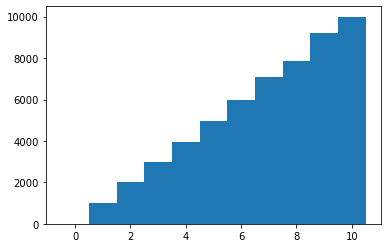

In [44]:
plt.hist(d2,bins = np.arange(random_list_size+1)-0.5);

In [45]:
import time

In [46]:
%%timeit 
func1(random_list_size,test_list)

26.5 µs ± 378 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [47]:
%%timeit 
func2(random_list_size,test_list)

32.4 µs ± 602 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### The first realization seems to be faster